In [92]:
import caffe
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

caffe.set_mode_cpu
root = 'E:\caffe-windows\caffe-windows\examples\mnist'
net = caffe.Net(root+'\lenet.prototxt',root+'\lenet_iter_10000.caffemodel',caffe.TRAIN)
[(k, v[0].data.shape) for k, v in net.params.items()]

np.set_printoptions(threshold='nan')



params_txt = 'params1.txt'
pf = open(params_txt, 'w')


for param_name in net.params.keys():
    weight = net.params[param_name][0].data
    bias = net.params[param_name][1].data
    pf.write(param_name)
    pf.write('\n')
    pf.write('\n' + param_name + '_weight:\n\n')
    weight.shape = (-1, 1)
    for w in weight:
        pf.write('%ff, ' % w)
    pf.write('\n\n' + param_name + '_bias:\n\n')
    bias.shape = (-1, 1)
    for b in bias:
        pf.write('%ff, ' % b)

    pf.write('\n\n')

pf.close()


In [93]:
def show_feature(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.imshow(data)
    plt.axis('off')

In [118]:
data = net.params["conv1"][0].data
n = int(np.ceil(np.sqrt(data.shape[0])))
print data[0]
print '---------'
print data[1]
print '---------'
print data

[[[0.63886786 0.65876037 0.78151774 0.7873748  0.6036599 ]
  [0.49515352 0.4020048  0.18627565 0.13355614 0.25862628]
  [0.24517514 0.21834569 0.14093862 0.20251906 0.08767056]
  [0.36540073 0.22519442 0.28643852 0.3212873  0.6560971 ]
  [0.36810252 0.72292775 0.80622303 0.7870936  0.7921842 ]]]
---------
[[[0.45178655 0.18099703 0.22603522 0.5947778  0.21347788]
  [0.77405053 0.5158212  0.547188   0.6653185  0.5614136 ]
  [0.60517323 0.6597445  0.88387835 0.70701295 0.6775473 ]
  [0.50401044 0.3610669  0.45940632 0.66732234 0.3406844 ]
  [0.28162855 0.1498392  0.16112828 0.2552213  0.5420784 ]]]
---------
[[[[0.63886786 0.65876037 0.78151774 0.7873748  0.6036599 ]
   [0.49515352 0.4020048  0.18627565 0.13355614 0.25862628]
   [0.24517514 0.21834569 0.14093862 0.20251906 0.08767056]
   [0.36540073 0.22519442 0.28643852 0.3212873  0.6560971 ]
   [0.36810252 0.72292775 0.80622303 0.7870936  0.7921842 ]]]


 [[[0.45178655 0.18099703 0.22603522 0.5947778  0.21347788]
   [0.77405053 0.51582

(20L, 1L, 5L, 5L)


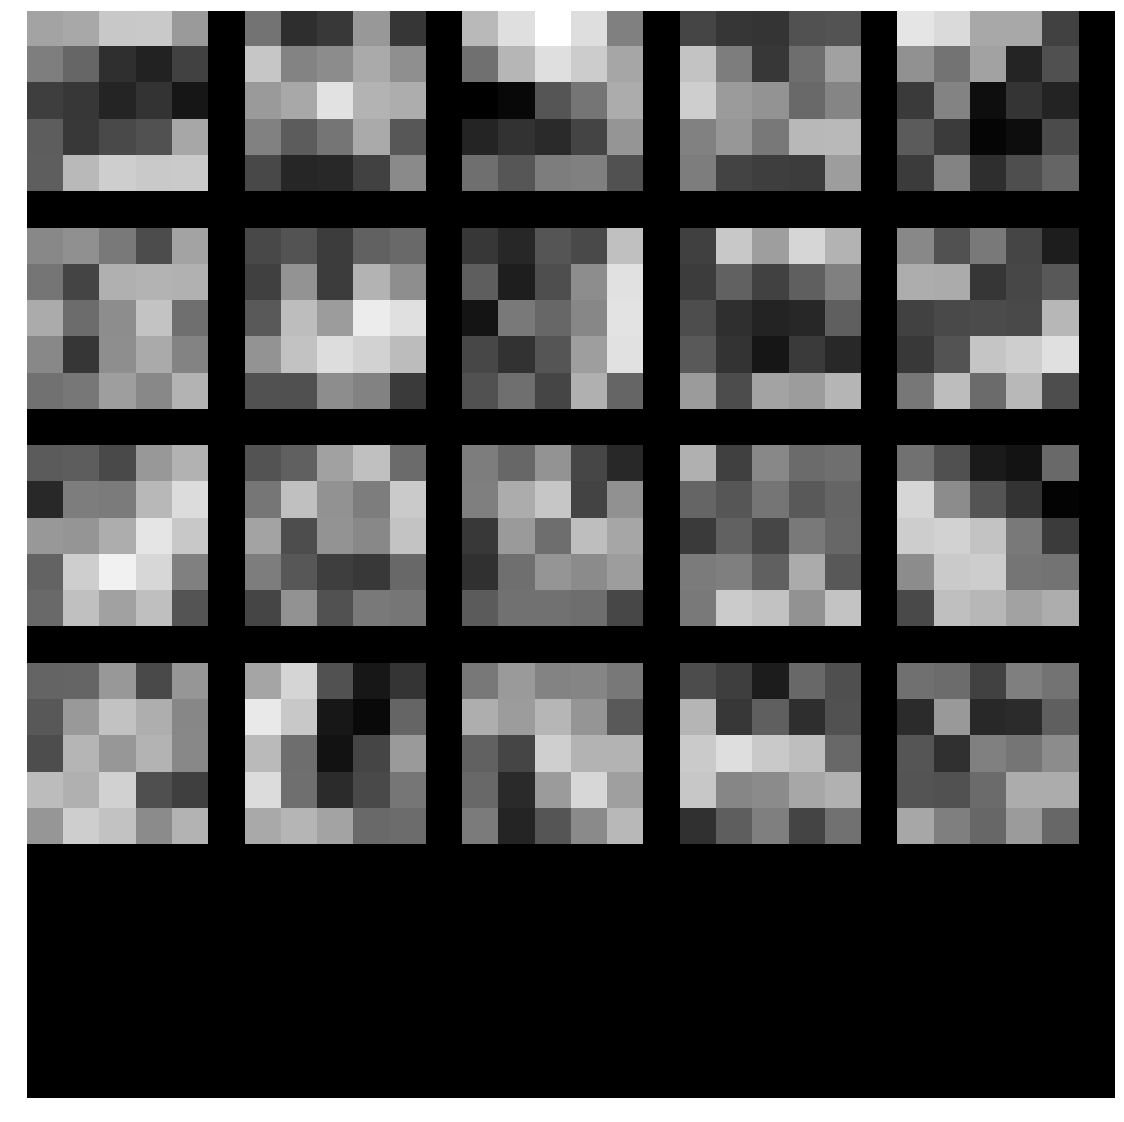

In [94]:
weight1 = net.params["conv1"][0].data
print weight1.shape
target=weight1.reshape(20*1, 5, 5)
show_feature(weight1.reshape(20*1, 5, 5))

(50L, 20L, 5L, 5L)


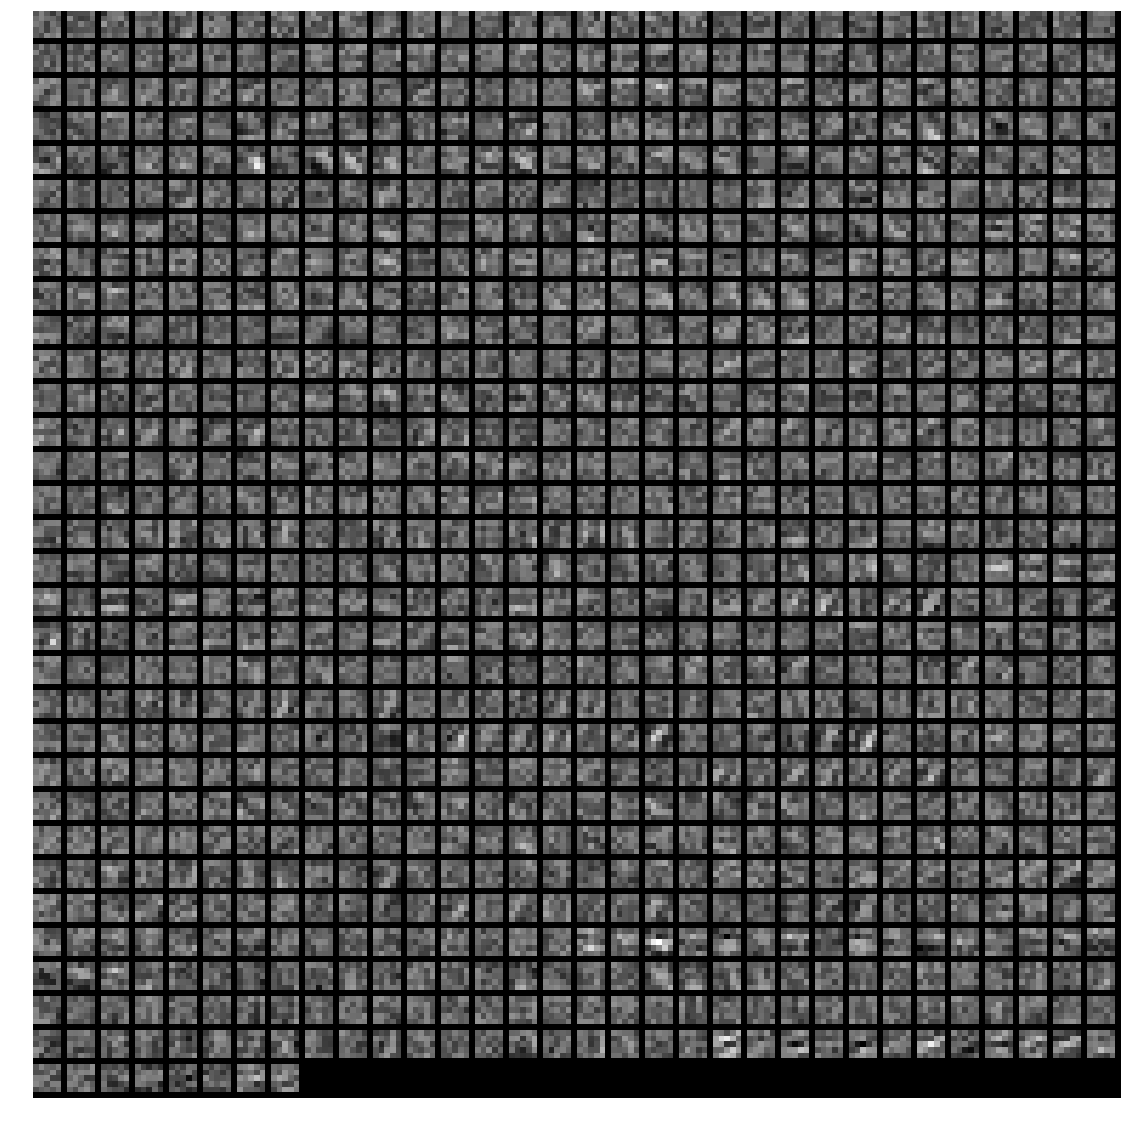

In [95]:
weight2 = net.params["conv2"][0].data
print weight2.shape
show_feature(weight2.reshape(50*20, 5, 5))

(500L, 800L)


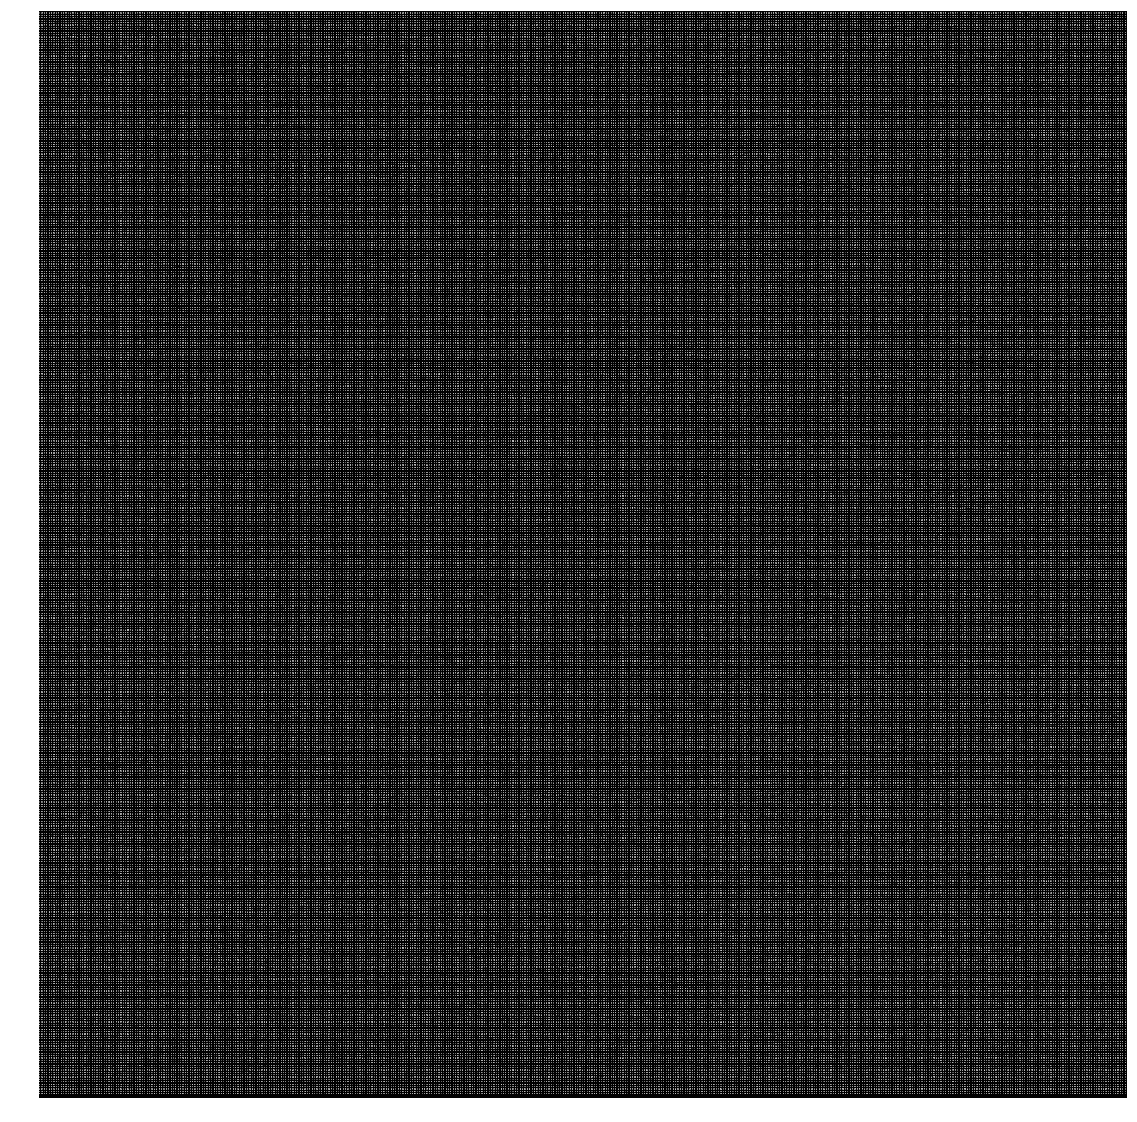

In [105]:
weight3 = net.params["ip1"][0].data
print weight3.shape
show_feature(weight3.reshape(500*800, 1, 1))

(10L, 500L)


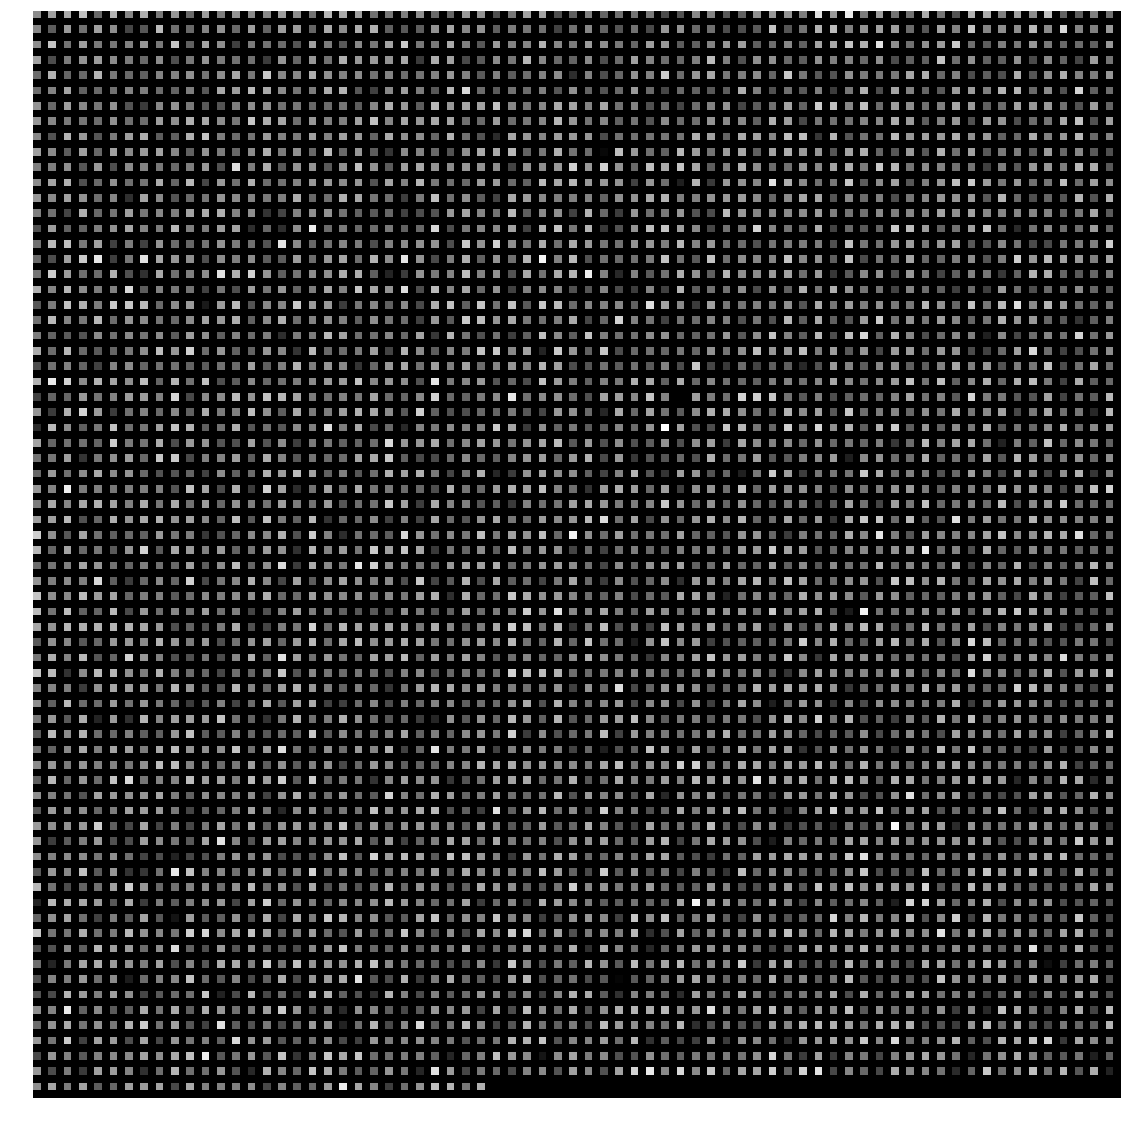

In [106]:
weight4 = net.params["ip2"][0].data
print weight4.shape
show_feature(weight4.reshape(10*500, 1, 1))

In [107]:
net.params.items

<bound method OrderedDict.items of OrderedDict([('conv1', <caffe._caffe.BlobVec object at 0x0000000016268DB0>), ('conv2', <caffe._caffe.BlobVec object at 0x0000000016268EE8>), ('ip1', <caffe._caffe.BlobVec object at 0x0000000016268F50>), ('ip2', <caffe._caffe.BlobVec object at 0x0000000016B8B458>)])>